In [36]:
#### CREDITS: Wencen Wu ####
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

In [37]:
import random
# Perceptron Learning Algorithm
def PLA(max_iter,sep, w0=0, w1=0, w2=0):
    
    top,bottom = generatedata(rad,thk,sep,2000)
    
    X1 = [i[0] for i in top]
    Y1 = [i[1] for i in top]
    X2 = [i[0] for i in bottom]
    Y2 = [i[1] for i in bottom]
    
    # flag to indicate that no missclassified points left
    done = False
    # inetrations counter
    k = 0
    
    while done == False and k < max_iter:       
        for i in np.random.permutation(len(top)+len(bottom)):
            done = True
            if i < len(top): #top
                z = -1.0  
                s = w0 + w1*X1[i] + w2*Y1[i]
                if  s*z <= 0:                        
                    w0= w0 + z
                    w1= w1 + z*X1[i]
                    w2= w2 + z*Y1[i]
                    done = False
                    break      
            else: #bottom
                z = 1.0    
                s = w0 + w1*X2[i-len(top)] + w2*Y2[i-len(top)]
                if  s*z <= 0:                        
                    w0= w0 + z
                    w1= w1 + z*X2[i-len(top)]
                    w2= w2 + z*Y2[i-len(top)]
                    done = False
                    break    
        k= k + 1
    return k
    

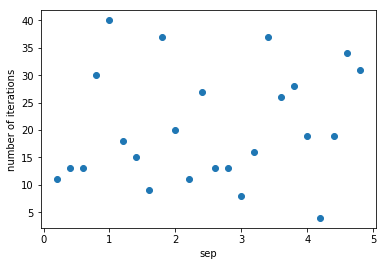

In [38]:
import matplotlib.pyplot as plt

k = [] 
s = []
sep = 0.2

while sep <= 5.0:
    k.append(PLA(1000,sep, w0=0.0, w1=0.0, w2=0.0))
    s.append(sep)
    sep += 0.2
        
plt.scatter(s,k)
plt.xlabel('sep')
plt.ylabel('number of iterations')
plt.show()
   

If the data is lineary separable, the PLA will converge.